## 데이타 탐색 분석(EDA)과 전처리: 영화 리뷰 데이타 IMDB 영화평

### 1. 데이터 분석 및 전처리

### 1) 데이터 불러오기 및 분석하기

영화 리뷰 데이터를 불러온 후 탐색적 데이터 분석 과정을 진행한다.  
데이터 분석은 다음의 순서로 진행한다.

* 데이터의 개수
* 각 리뷰의 문자 길이 분포
* 많이 사용된 단어
* 긍, 부정 데이터의 분포
* 각 리뷰의 단어 개수 분포
* 특수문자 및 대, 소문자 비율 

In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 데이터 불러오기

In [2]:
train_data = pd.read_csv('./data_in/labeledTrainData.tsv', header = 0, delimiter = '\t', quoting = 3)
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


- id, sentiment, review 로 구분, 각 review에 대한 감정(sentiment)이 긍정(1), 부정(0)로 표시

In [34]:
train_data.shape

(25000, 3)

In [35]:
# index, null check, data type, column name 등의 정보 확인 
train_data.info()
# memory를 줄이려면 sentiment(0과 1밖에 업음)를 int32로 확 줄여준다던가..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [36]:
train_data['sentiment'].value_counts()

0    12500
1    12500
Name: sentiment, dtype: int64

### 데이터 개수

In [3]:
print('전체 학습데이터의 개수: {}'.format(len(train_data)))

전체 학습데이터의 개수: 25000


### 각 리뷰의 문자 길이 분포

In [4]:
train_length = train_data['review'].apply(len)

In [37]:
type(train_data)

pandas.core.frame.DataFrame

In [38]:
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

### 리뷰 문자 길이에 대한 히스토그램 

<ipython-input-6-1ce5d8c65d9a>:11: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


Text(0, 0.5, 'Number of review')

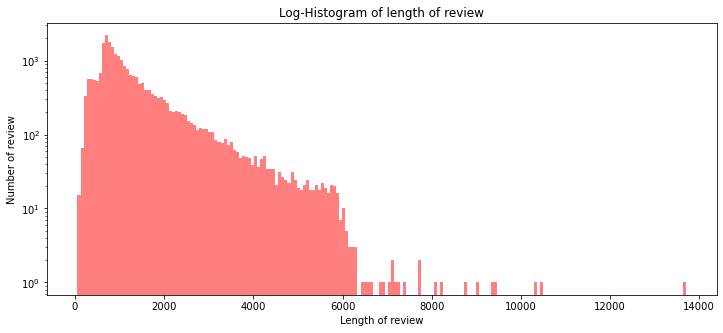

In [6]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_length, bins=200, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of length of review') # 그래프 제목
plt.xlabel('Length of review') # 그래프 x 축 라벨
plt.ylabel('Number of review') # 그래프 y 축 라벨

- 그래프 해석)
- 리뷰의 문자 길이가 대부분 6000 이하이고 대부분 2000 이하에 분포되어 있음을 할 수 있음
- 일부 데이타의 경우 10000 이상의 값을 가지고 있어 이상치로 보인다.

### 리뷰 문자 길이에 대한 기술 통계

In [7]:
print('리뷰 길이 최대 값: {}'.format(np.max(train_length)))
print('리뷰 길이 최소 값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간 값: {}'.format(np.median(train_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최대 값: 13710
리뷰 길이 최소 값: 54
리뷰 길이 평균 값: 1329.71
리뷰 길이 표준편차: 1005.22
리뷰 길이 중간 값: 983.0
리뷰 길이 제 1 사분위: 705.0
리뷰 길이 제 3 사분위: 1619.0


- 해석)
- 리뷰의 길이 평균이 1300정도, 최대값이 13000

### 리뷰 문자 길이에 대한 박스 플롯

{'whiskers': [<matplotlib.lines.Line2D at 0x11f6b4e80>,
 'caps': [<matplotlib.lines.Line2D at 0x11f6bf580>,
 'boxes': [<matplotlib.lines.Line2D at 0x11f6b4b20>],
 'medians': [<matplotlib.lines.Line2D at 0x11f6bfc40>],
 'fliers': [<matplotlib.lines.Line2D at 0x11f6c9340>],
 'means': [<matplotlib.lines.Line2D at 0x11f6bffa0>]}

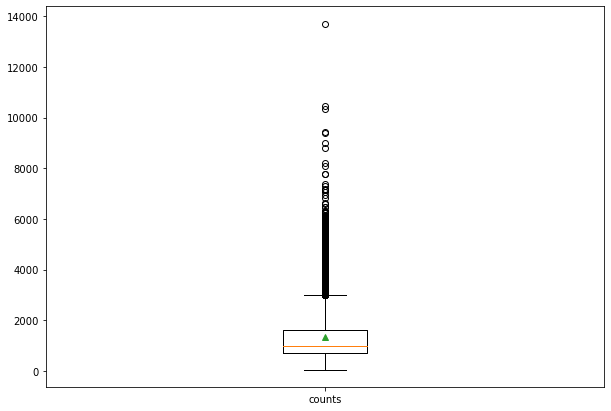

In [8]:
plt.figure(figsize=(10, 7))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot(train_length, labels=['counts'], showmeans=True)

- 그래프 해석)
- 리뷰 길이가 대부분 2000 이하, 평균이 1500 이하, 길이가 4000 이상인 이상치도 많이 있음

### 많이 사용된 단어 살펴보기 - 워드클라우드

In [ ]:
#!pip install wordcloud

(-0.5, 799.5, 599.5, -0.5)

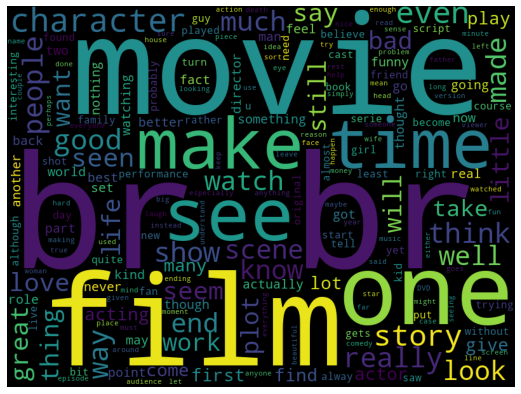

In [10]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(train_data['review']))
plt.figure(figsize=(10, 7))
plt.imshow(cloud)
plt.axis('off')

- 그래프 해석)
- 가장 많이 나온 단어는 br --> br 태그이므로, 전처리 작업에서 제거해야 함

### 라벨의 분포 - 긍, 부정 데이터의 분포

/Users/lisemara/miniforge3/envs/tf/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

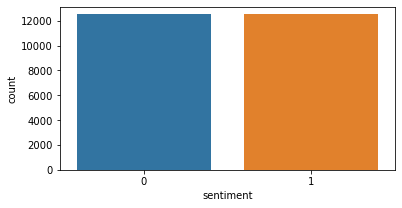

In [11]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['sentiment'])

- 그래프 해석)
- 라벨의 분포가 거의 동일

### 각 라벨에 대한 정확한 개수 확인

In [12]:
print("긍정 리뷰 개수: {}".format(train_data['sentiment'].value_counts()[1]))
print("부정 리뷰 개수: {}".format(train_data['sentiment'].value_counts()[0]))

긍정 리뷰 개수: 12500
부정 리뷰 개수: 12500


------------------------
### 각 리뷰의 단어 개수 분포 확인 
- 띄어쓰기 기준

In [13]:
train_word_counts = train_data['review'].apply(lambda x:len(x.split(' ')))

- 리뷰 단어 개수 히스트그램

<ipython-input-14-8391893684aa>:4: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


Text(0, 0.5, 'Number of reviews')

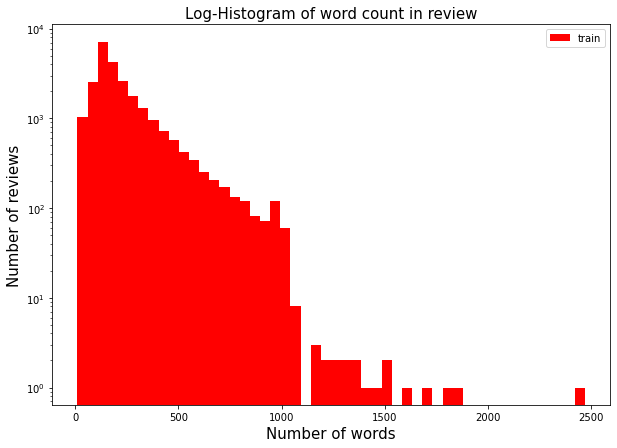

In [14]:
plt.figure(figsize=(10, 7))
plt.hist(train_word_counts, bins=50, facecolor='r',label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

- 그래프 해석)
- 대부분의 리뷰의 단어 수가 100개 미만, 대부분 200개 정도의 단어를 가지고 있음을 확인 

### 리뷰 단어 개수 기술 통계

In [15]:
print('리뷰 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최소 값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최대 값: 2470
리뷰 단어 개수 최소 값: 10
리뷰 단어 개수 평균 값: 233.79
리뷰 단어 개수 표준편차: 173.74
리뷰 단어 개수 중간 값: 174.0
리뷰 단어 개수 제 1 사분위: 127.0
리뷰 단어 개수 제 3 사분위: 284.0


- 해석)
- 리뷰 단어 개수 평균이 233개, 최대값이 2,470개의 단어
- 3사분위값이 284개로 리뷰의 75%가 300개 이하의 단어로 구성되어 있음을 확인

### 특수문자 및 대, 소문자 비율

In [16]:
qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
fullstop = np.mean(train_data['review'].apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_data['review'].apply(lambda x: x[0].isupper())) #  첫번째 대문자
capitals = np.mean(train_data['review'].apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
numbers = np.mean(train_data['review'].apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개
                  
print('물음표가있는 질문: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자 인 질문: {:.2f}%'.format(capital_first * 100))
print('대문자가있는 질문: {:.2f}%'.format(capitals * 100))
print('숫자가있는 질문: {:.2f}%'.format(numbers * 100))

물음표가있는 질문: 29.55%
마침표가 있는 질문: 99.69%
첫 글자가 대문자 인 질문: 0.00%
대문자가있는 질문: 99.59%
숫자가있는 질문: 56.66%


- 해석)
- 대부분 마침표를 포함하고 있고, 대문자도 대부분 사용하고 있음
- 전처리 과정에서 대문자의 경우 모두 소문자로 바꾸고 특수문자의 경우 제거한다.

### 2) 데이터 전처리

데이터 분석과정을 바탕으로 데이터를 모델에 적용시키기 위해 전처리 과정을 진행

- 전처리에 필요한 라이브러리 불러오기

In [17]:
import re
import json
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

- 데이타 불러오기 : pandas
- 데이타 정제 : re, BeautifulSoup
- 불용어 제거 : NLTK의 stopwords 모듈
- 토크나이징 : tensorflow의 pad_sequences, Tokenizer
- 정제된 데이타 저장 : numpy 

### 학습 데이타 불러오기

In [18]:
DATA_IN_PATH = './data_in/'

train_data = pd.read_csv( DATA_IN_PATH + 'labeledTrainData.tsv', header = 0, delimiter = '\t', quoting = 3)
print(train_data['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

### HTML 태그와 특수문자 제거
- BeautifulSoup을 이용한 HTML 태그 제거
- re.sub를 이용한 특수문자 제거 
    - 알파벳을 제외한 모든 문자(숫자 및 특수기호)를 공백으로 대체

In [19]:
review = train_data['review'][0] # 리뷰 중 하나를 가져온다.
review_text = BeautifulSoup(review,"html.parser").get_text() # HTML 태그 제거
review_text = re.sub("[^a-zA-Z]", " ", review_text ) # 영어 문자를 제외한 나머지는 모두 공백으로 바꾼다.

In [20]:
print(review_text)

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

### 불용어 삭제 
- NLTK의 불용어 사전 이용
- NLTK의 불용어 사전은 소문자 단어로 구성되어 있으므로, 
- 불용어를 제거하기 위해서는 먼저 모든 문자를 소문자로 바꾼 후 불용어 제거해야 한다.

In [21]:
stop_words = set(stopwords.words('english')) # 영어 불용어들의 set을 만든다.

review_text = review_text.lower() # 소문자 변환 후
words = review_text.split()  # 띄어쓰기 기준으로 단어를 나눠서 단어 리스트로 만든다.
print('불용어 제거 전 단어 수: ', len(words))
words = [w for w in words if not w in stop_words] # 불용어 제거한 리스트를 만든다
print('불용어 제거 후 단어 수: ', len(words))

불용어 제거 전 단어 수:  437
불용어 제거 후 단어 수:  219


In [22]:
print(words)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

### 모델에 적용하기 위해서 단어 리스트 --> 문자열로 합쳐야 한다.
- 파이썬의 join() 함수 이용

In [23]:
clean_review = ' '.join(words) # 단어 리스트들을 다시 하나의 문자열로 합친다.
print(clean_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

### 전처리 과정 함수화 

In [24]:
def preprocessing(review, remove_stopwords = False): 
    # 불용어 제거는 옵션으로 선택 가능하다.
    
    # 1. HTML 태그 제거
    review_text = BeautifulSoup(review, "html.parser").get_text()
    
    # 2. 영어가 아닌 특수문자들을 공백(" ")으로 바꾸기
    review_text = re.sub("[^a-zA-Z]", " ", review_text)

    # 3. 대문자들을 소문자로 바꾸고 공백단위로 텍스트들 나눠서 리스트로 만든다.
    words = review_text.lower().split()

    if remove_stopwords: 
        # 4. 불용어 제거
    
        #영어에 관련된 불용어 불러오기
        stops = set(stopwords.words("english"))
        # 불용어가 아닌 단어들로 이루어진 새로운 리스트 생성
        words = [w for w in words if not w in stops]
        # 5. 단어 리스트를 공백을 넣어서 하나의 글로 합친다.
        clean_review = ' '.join(words)

    else: # 불용어 제거하지 않을 때
        clean_review = ' '.join(words)

    return clean_review

### 전체 데이타(25000건)에 전처리 함수 수행

In [25]:
clean_train_reviews = []
for review in train_data['review']:
    clean_train_reviews.append(preprocessing(review, remove_stopwords = True))

# 전처리한 데이터 출력
clean_train_reviews[0]

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

In [26]:
print(len(clean_train_reviews))

25000


### 3) 전처리가 끝난 데이타를 텍스트 데이타와 인덱스로 벡터화한 데이타로 저장
- 모델에 따라 단어들의 인덱스로 구성된 벡터 형태가 필요하기도 하고
- 모델에 따라 벡터가 아닌 텍스트로 구성되어야 하는 경우도 있으므로
- 지금까지 전처리한 데이타는 판다스의 데이타프레임으로 일단 저장해 둔다.

### (1) 전처리한 텍스트 데이타를 데이타프레임으로 저장

In [27]:
# 전처리 과정이 끝난 전체 데이타 -> 데이타프레임으로 저장
clean_train_df = pd.DataFrame({'review': clean_train_reviews, 'sentiment': train_data['sentiment']})

In [28]:
clean_train_df.head()

,review,sentiment
0,stuff going moment mj started listening music ...,1
1,classic war worlds timothy hines entertaining ...,1
2,film starts manager nicholas bell giving welco...,0
3,must assumed praised film greatest filmed oper...,0
4,superbly trashy wondrously unpretentious explo...,1


In [29]:
clean_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     25000 non-null  object
 1   sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


### (2) 머신러닝 분류 모델에 적용할 train 데이타와 test 데이타를 csv 파일로 저장

#### train 데이타 저장 : 'train_clean.csv'

In [30]:
TRAIN_CLEAN_DATA = 'train_clean.csv'

import os
DATA_IN_PATH = './data_in/'

# 저장하는 디렉토리가 존재하지 않으면 생성
if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)
    
# 정제된 텍스트를 csv 형태로 저장
clean_train_df.to_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA, index = False)    

#### test 데이타 저장
- 정제된 텍스트 데이타(id와 리뷰만 저장) : 'test_clean.csv'

In [31]:
clean_test_df = pd.DataFrame({'review': clean_test_reviews, 'id': test_data['id']})
test_id = np.array(test_data['id'])

NameError: name 'clean_test_reviews' is not defined

In [32]:
TEST_CLEAN_DATA = 'test_clean.csv'

clean_test_df.to_csv(DATA_IN_PATH + TEST_CLEAN_DATA, index = False)

NameError: name 'clean_test_df' is not defined

---------------------------
## 딥러닝 모델에 적용할 파일로 저장

### (1) 각 단어의 인덱스로 벡터화
- 각 단어의 인덱스로 벡터화: 텐서플로의 전처리 모듈 Tokenizer 사용
    - Tokenizer 모듈 생성 -> 정제된 데이타에 적용 -> 인덱스로 구성된 벡터로 변환

In [59]:
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_reviews)
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews)

In [60]:
# 인덱스로 구성된 벡터 첫번째 값 : 각 단어의 인덱스로 바뀜
print(text_sequences[0])

[404, 70, 419, 8815, 506, 2456, 115, 54, 873, 516, 178, 18686, 178, 11242, 165, 78, 14, 662, 2457, 117, 92, 10, 499, 4074, 165, 22, 210, 581, 2333, 1194, 11242, 71, 4826, 71, 635, 2, 253, 70, 11, 302, 1663, 486, 1144, 3265, 8815, 411, 793, 3342, 17, 441, 600, 1500, 15, 4424, 1851, 998, 146, 342, 1442, 743, 2424, 4, 8815, 418, 70, 637, 69, 237, 94, 541, 8815, 26055, 26056, 120, 1, 8815, 323, 8, 47, 20, 323, 167, 10, 207, 633, 635, 2, 116, 291, 382, 121, 15535, 3315, 1501, 574, 734, 10013, 923, 11578, 822, 1239, 1408, 360, 8815, 221, 15, 576, 8815, 22224, 2274, 13426, 734, 10013, 27, 28606, 340, 16, 41, 18687, 1500, 388, 11243, 165, 3962, 8815, 115, 627, 499, 79, 4, 8815, 1430, 380, 2163, 114, 1919, 2503, 574, 17, 60, 100, 4875, 5100, 260, 1268, 26057, 15, 574, 493, 744, 637, 631, 3, 394, 164, 446, 114, 615, 3266, 1160, 684, 48, 1175, 224, 1, 16, 4, 8815, 3, 507, 62, 25, 16, 640, 133, 231, 95, 7426, 600, 3439, 8815, 37248, 1864, 1, 128, 342, 1442, 247, 3, 865, 16, 42, 1487, 997, 2333, 12

In [63]:
# 각 인덱스가 어떤 단어를 의미하는 지 확인: 단어사전 필요
word_vocab = tokenizer.word_index
word_vocab["<PAD>"] = 0  # word_index에 <PAD>값이 정의되어 있지 않으므로 <PAD>의 인덱스 값을 0으로 입력
print(word_vocab)

{'movie': 1, 'film': 2, 'one': 3, 'like': 4, 'good': 5, 'time': 6, 'even': 7, 'would': 8, 'story': 9, 'really': 10, 'see': 11, 'well': 12, 'much': 13, 'get': 14, 'bad': 15, 'people': 16, 'also': 17, 'first': 18, 'great': 19, 'made': 20, 'way': 21, 'make': 22, 'could': 23, 'movies': 24, 'think': 25, 'characters': 26, 'character': 27, 'watch': 28, 'two': 29, 'films': 30, 'seen': 31, 'many': 32, 'life': 33, 'plot': 34, 'acting': 35, 'never': 36, 'love': 37, 'little': 38, 'best': 39, 'show': 40, 'know': 41, 'ever': 42, 'man': 43, 'better': 44, 'end': 45, 'still': 46, 'say': 47, 'scene': 48, 'scenes': 49, 'go': 50, 'something': 51, 'back': 52, 'real': 53, 'watching': 54, 'though': 55, 'thing': 56, 'old': 57, 'years': 58, 'actors': 59, 'director': 60, 'work': 61, 'another': 62, 'new': 63, 'nothing': 64, 'funny': 65, 'actually': 66, 'makes': 67, 'look': 68, 'find': 69, 'going': 70, 'part': 71, 'lot': 72, 'every': 73, 'world': 74, 'cast': 75, 'us': 76, 'quite': 77, 'want': 78, 'things': 79, 'p

TypeError: 'NoneType' object is not subscriptable

In [64]:
# 전체 데이타에서 사용된 단어의 총 개수
print("전체 단어 개수: ", len(word_vocab))

전체 단어 개수:  74066


### 단어 사전, 전체 단어 개수 딕셔너리에 저장
- 추후 모델에서 사용

In [65]:
data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)

### 2) 패딩 과정 - 데이타의 길이 맞추기
- 각 데이타의 길이가 서로 다른데 이 길이를 하나로 통일해야 모델에 바로 적용 가능하기 때문에
- 특정 길이를 최대 길이로 정하고 더 긴 데이타의 경우는 뒷부분을 자르고
- 더 짧은 데이타의 경우에는 0 값으로 패딩하는 작업 진행
- 텐서플로우의 전처리 모듈 이용

In [21]:
MAX_SEQUENCE_LENGTH = 174 # 문장 최대 길이

train_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

print('Shape of train data: ', train_inputs.shape)

Shape of train data:  (25000, 174)


- 최대 길이 174 : 단어 갯의 통계에서 중간값
     - 25,000개의 데이타가 174라는 길이를 동일하게 가지게 되었음을 확인
- 텐서플로우의 pad_sequences() 함수 사용
    - pad_sequences(패딩을 적용할 데이타, 최대길이값, 0값을 데이타 앞에 넣을지 뒤에 넣을지 설정)

### 3) 학습 시 라벨(정답)을 나타내는 값을 넘파이 배열로 저장
- 전처리한 데이타를 저장할 때 넘파이 형태로 저장하기 때문에 정답도 넘파이 형태로 저장

In [66]:
train_labels = np.array(train_data['sentiment'])
print('Shape of label tensor:', train_labels.shape)

Shape of label tensor: (25000,)


In [67]:
train_labels[:10]

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

### 4) 전처리 과정이 끝난 데이타 저장
- 정제된 텍스트 데이타 : csv 파일로 저장, 'train_clean.csv'
- 벡터화된 데이타 : 넘파이 파일로 저장, 'train_input.npy'
- 정답 라벨 : 넘파이 파일로 저장, 'train_label.npy'
- 데이타 정보(단어사전, 전체 단어 개수): 딕셔너리 형태이므로 JSON 파일로 저장, 'data_configs.json'

In [68]:
TRAIN_INPUT_DATA = 'train_input.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
DATA_CONFIGS = 'data_configs.json'

import os

DATA_IN_PATH = './data_in/'

# 저장하는 디렉토리가 존재하지 않으면 생성
if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)

In [69]:
# 전처리 된 데이터를 넘파이 형태로 저장
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)

# 데이터 사전을 json 형태로 저장
json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False)

### 5) 테스트 데이타도 학습 데이타와 동일한 과정 진행
- 테스트 데이타는 라벨(정답)이 없으므로 따로 저장하지 않아도 된다.
- 단어사전과 단어 개수에 대한 정보도 학습 데이타의 것을 사용해야 하므로 저장하지 않아도 된다.
    - 학습 데이타와 동일한 인덱스 정보를 사용해야만 함
- 테스트 데이타는 각 리뷰에 대한 'id'값은 저장해야 한다.

- 벡터화된 데이타 : 넘파이 파일로 저장, 'test_input.npy'
- 테스트 데이타는 각 리뷰에 대한 'id'값 저장, 'test_id.npy'

In [70]:
test_data = pd.read_csv(DATA_IN_PATH + "testData.tsv", header=0, delimiter="\t", quoting=3)

clean_test_reviews = []

for review in test_data['review']:
    clean_test_reviews.append(preprocessing(review, remove_stopwords = True))

clean_test_df = pd.DataFrame({'review': clean_test_reviews, 'id': test_data['id']})
test_id = np.array(test_data['id'])

text_sequences = tokenizer.texts_to_sequences(clean_test_reviews)
test_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [71]:
TEST_INPUT_DATA = 'test_input.npy'
TEST_ID_DATA = 'test_id.npy'

np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DATA_IN_PATH + TEST_ID_DATA, 'wb'), test_id)